In [22]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [23]:
# Set the path to your dataset
train_data_dir = 'train'
test_data_dir = 'test'

In [37]:
# Parameters
batch_size = 32
image_size = (128, 128)
epochs = 25
num_classes = 10 

In [38]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [39]:
# Build CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [40]:
# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/25
72/72 [==============================] - 11s 155ms/step - loss: 2.2845 - accuracy: 0.1417 - val_loss: 2.2462 - val_accuracy: 0.1893
Epoch 2/25
72/72 [==============================] - 11s 153ms/step - loss: 2.1500 - accuracy: 0.2203 - val_loss: 2.1071 - val_accuracy: 0.2576
Epoch 3/25
72/72 [==============================] - 11s 153ms/step - loss: 1.9159 - accuracy: 0.2886 - val_loss: 1.9267 - val_accuracy: 0.3132
Epoch 4/25
72/72 [==============================] - 11s 152ms/step - loss: 1.7364 - accuracy: 0.3516 - val_loss: 1.7694 - val_accuracy: 0.2995
Epoch 5/25
72/72 [==============================] - 11s 151ms/step - loss: 1.6080 - accuracy: 0.3881 - val_loss: 1.7955 - val_accuracy: 0.3502
Epoch 6/25
72/72 [==============================] - 12s 162ms/step - loss: 1.5519 - accuracy: 0.4129 - val_loss: 1.8557 - val_accuracy: 0.2956
Epoch 7/25
72/72 [==============================] - 11s 152ms/step - loss: 1.5136 - accuracy: 0.4407 - val_loss: 1.7239 - val_accuracy: 0.3707

In [42]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

33/33 [==============================] - 1s 37ms/step - loss: 1.6288 - accuracy: 0.4527
Test accuracy: 0.4526829123497009


In [43]:
# Save the model
model.save('fruit_classifier_model.h5')

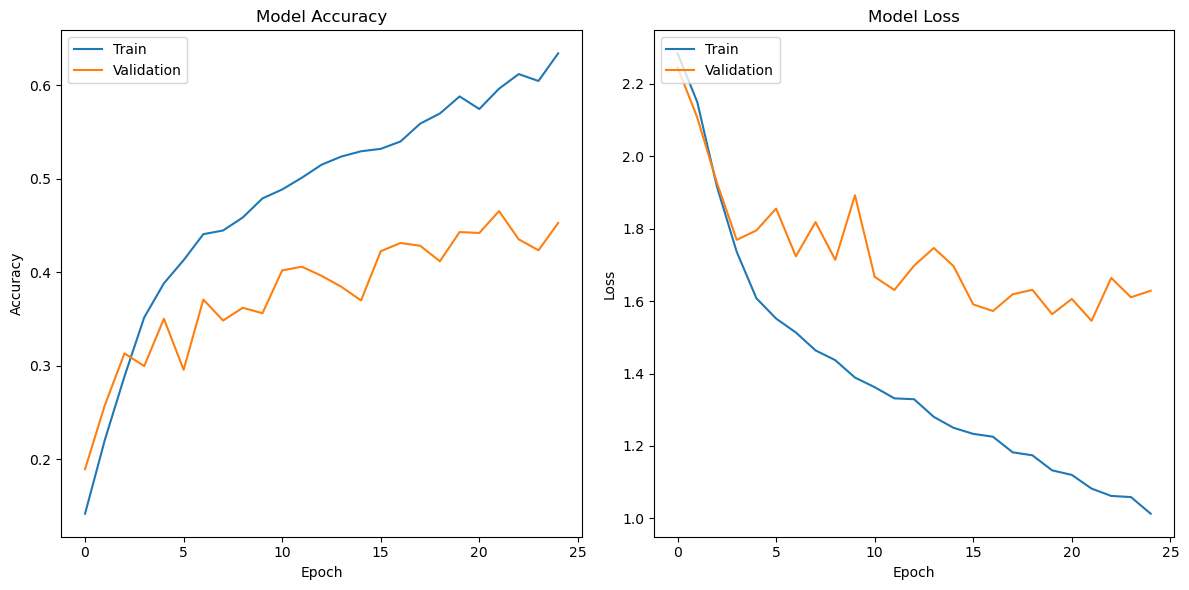

In [44]:
# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)
